In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

628

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | touros
Processing Record 2 of Set 1 | cherskiy
Processing Record 3 of Set 1 | hobart
Processing Record 4 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 5 of Set 1 | butaritari
Processing Record 6 of Set 1 | tuatapere
Processing Record 7 of Set 1 | ponta do sol
Processing Record 8 of Set 1 | beloha
Processing Record 9 of Set 1 | punta arenas
Processing Record 10 of Set 1 | angermunde
Processing Record 11 of Set 1 | kalmunai
Processing Record 12 of Set 1 | segou
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | antalaha
Processing Record 15 of Set 1 | dawlatabad
Processing Record 16 of Set 1 | vaini
Processing Record 17 of Set 1 | mayya
Processing Record 18 of Set 1 | mataura
Processing Record 19 of Set 1 | albany
Processing Record 20 of Set 1 | mahebourg
Processing Record 21 of Set 1 | atuona
Processing Record 22 of Set 1 | novobirilyussy
Processing Reco

Processing Record 37 of Set 4 | evensk
Processing Record 38 of Set 4 | merritt island
Processing Record 39 of Set 4 | husavik
Processing Record 40 of Set 4 | dukat
Processing Record 41 of Set 4 | castro
Processing Record 42 of Set 4 | sitka
Processing Record 43 of Set 4 | torbay
Processing Record 44 of Set 4 | port-gentil
Processing Record 45 of Set 4 | port shepstone
Processing Record 46 of Set 4 | laguna
Processing Record 47 of Set 4 | hamilton
Processing Record 48 of Set 4 | campos gerais
Processing Record 49 of Set 4 | tumannyy
City not found. Skipping...
Processing Record 50 of Set 4 | saint anthony
Processing Record 1 of Set 5 | berlevag
Processing Record 2 of Set 5 | campina grande do sul
Processing Record 3 of Set 5 | khilok
Processing Record 4 of Set 5 | osoyoos
Processing Record 5 of Set 5 | wuwei
Processing Record 6 of Set 5 | gao
Processing Record 7 of Set 5 | clyde river
Processing Record 8 of Set 5 | flinders
Processing Record 9 of Set 5 | babanusah
City not found. Skippi

Processing Record 29 of Set 8 | leninskoye
Processing Record 30 of Set 8 | puerto escondido
Processing Record 31 of Set 8 | bafoulabe
Processing Record 32 of Set 8 | lorengau
Processing Record 33 of Set 8 | san isidro
Processing Record 34 of Set 8 | vuktyl
Processing Record 35 of Set 8 | wewak
Processing Record 36 of Set 8 | qaqortoq
Processing Record 37 of Set 8 | almaznyy
Processing Record 38 of Set 8 | roscommon
Processing Record 39 of Set 8 | axim
Processing Record 40 of Set 8 | tulagi
Processing Record 41 of Set 8 | ust-kuyga
Processing Record 42 of Set 8 | foix
Processing Record 43 of Set 8 | mpika
Processing Record 44 of Set 8 | qandahar
City not found. Skipping...
Processing Record 45 of Set 8 | nishihara
Processing Record 46 of Set 8 | vanimo
Processing Record 47 of Set 8 | egvekinot
Processing Record 48 of Set 8 | molango
Processing Record 49 of Set 8 | paris
Processing Record 50 of Set 8 | macaboboni
City not found. Skipping...
Processing Record 1 of Set 9 | tempio pausania


Processing Record 18 of Set 12 | tecpan
Processing Record 19 of Set 12 | hihifo
City not found. Skipping...
Processing Record 20 of Set 12 | muroran
Processing Record 21 of Set 12 | sault sainte marie
Processing Record 22 of Set 12 | abeche
Processing Record 23 of Set 12 | umea
Processing Record 24 of Set 12 | hualmay
Processing Record 25 of Set 12 | othaya
Processing Record 26 of Set 12 | kankakee
Processing Record 27 of Set 12 | attawapiskat
City not found. Skipping...
Processing Record 28 of Set 12 | salmas
Processing Record 29 of Set 12 | mudanya
Processing Record 30 of Set 12 | shubarshi
Processing Record 31 of Set 12 | urengoy
Processing Record 32 of Set 12 | heihe
Processing Record 33 of Set 12 | corn island
Processing Record 34 of Set 12 | panaba
Processing Record 35 of Set 12 | shizunai
Processing Record 36 of Set 12 | beringovskiy
Processing Record 37 of Set 12 | saint-augustin
Processing Record 38 of Set 12 | garissa
Processing Record 39 of Set 12 | daru
Processing Record 40

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Touros,-5.1989,-35.4608,79.70,80,1,9.69,BR,2022-01-31 01:35:50
1,Cherskiy,68.7500,161.3000,-27.65,99,47,1.12,RU,2022-01-31 01:35:50
2,Hobart,-42.8794,147.3294,85.23,60,20,1.01,AU,2022-01-31 01:34:06
3,Butaritari,3.0707,172.7902,81.88,76,65,20.13,KI,2022-01-31 01:35:50
4,Tuatapere,-46.1333,167.6833,70.83,63,90,6.85,NZ,2022-01-31 01:35:51
5,Ponta Do Sol,32.6667,-17.1000,65.12,33,0,10.13,PT,2022-01-31 01:35:51
6,Beloha,-25.1667,45.0500,71.51,77,9,13.31,MG,2022-01-31 01:35:51
7,Punta Arenas,-53.1500,-70.9167,48.31,61,75,29.93,CL,2022-01-31 01:35:51
8,Angermunde,53.0150,13.9992,40.89,86,100,9.89,DE,2022-01-31 01:35:52
9,Kalmunai,7.4167,81.8167,77.43,84,44,5.06,LK,2022-01-31 01:35:52


In [9]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Touros,BR,2022-01-31 01:35:50,-5.1989,-35.4608,79.70,80,1,9.69
1,Cherskiy,RU,2022-01-31 01:35:50,68.7500,161.3000,-27.65,99,47,1.12
2,Hobart,AU,2022-01-31 01:34:06,-42.8794,147.3294,85.23,60,20,1.01
3,Butaritari,KI,2022-01-31 01:35:50,3.0707,172.7902,81.88,76,65,20.13
4,Tuatapere,NZ,2022-01-31 01:35:51,-46.1333,167.6833,70.83,63,90,6.85
5,Ponta Do Sol,PT,2022-01-31 01:35:51,32.6667,-17.1000,65.12,33,0,10.13
6,Beloha,MG,2022-01-31 01:35:51,-25.1667,45.0500,71.51,77,9,13.31
7,Punta Arenas,CL,2022-01-31 01:35:51,-53.1500,-70.9167,48.31,61,75,29.93
8,Angermunde,DE,2022-01-31 01:35:52,53.0150,13.9992,40.89,86,100,9.89
9,Kalmunai,LK,2022-01-31 01:35:52,7.4167,81.8167,77.43,84,44,5.06


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

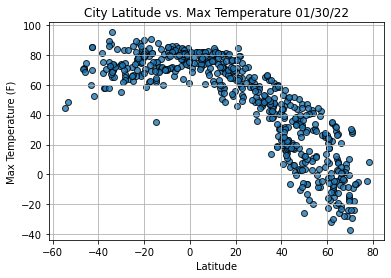

In [12]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

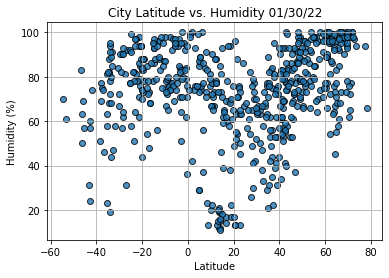

In [13]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

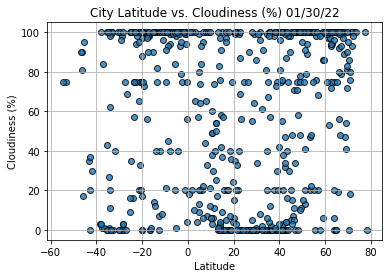

In [14]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

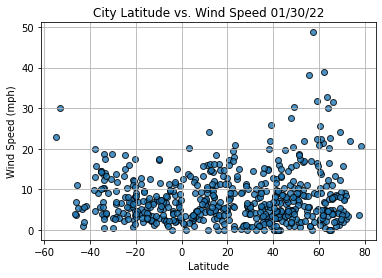

In [15]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [16]:
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [17]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

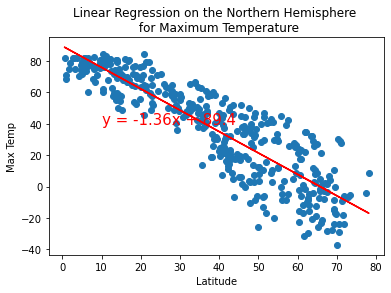

In [18]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

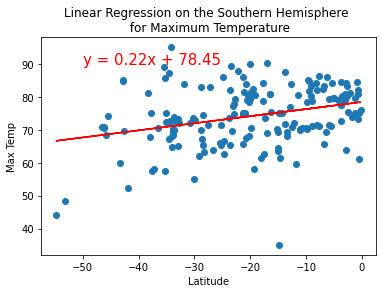

In [19]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

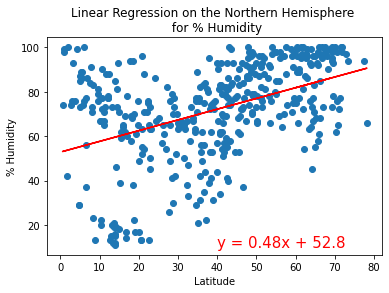

In [20]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

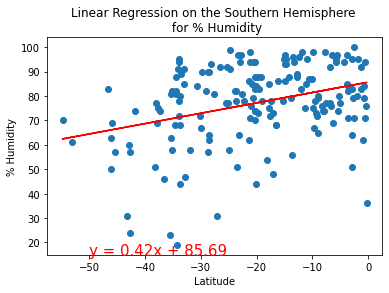

In [21]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

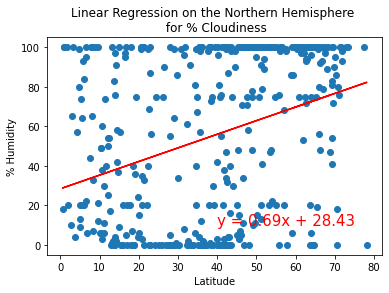

In [22]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Humidity',(40,10))

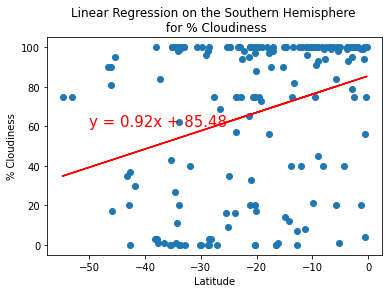

In [23]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

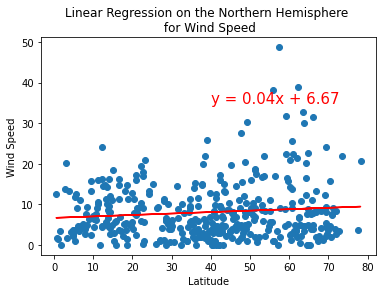

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

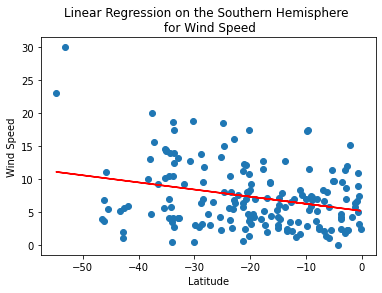

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))